# Naive Bayes

### Text

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "../websitedata/naiveText"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

teledf = pd.read_csv("../websitedata/television.csv")

teledf["sentiment"] = teledf["compound"].apply(lambda x: "Pos" if x > 0.5 else "Neg" if x < 0.0 else "Neu")
teledf = teledf.dropna()
#print(teledf.isna().sum())
print(teledf)

     Unnamed: 0        Word  neg  neu  pos  compound sentiment
0             0          in  0.0  1.0  0.0    0.0000       Neu
1             1      summer  0.0  1.0  0.0    0.0000       Neu
2             2       1985,  0.0  1.0  0.0    0.0000       Neu
3             3    hawkins,  0.0  1.0  0.0    0.0000       Neu
4             4       newly  0.0  1.0  0.0    0.0000       Neu
..          ...         ...  ...  ...  ...       ...       ...
305          26       love,  0.0  0.0  1.0    0.6369       Pos
306          27  surrounded  0.0  1.0  0.0    0.0000       Neu
307          28     friends  0.0  0.0  1.0    0.4767       Neu
308          29      rivals  0.0  1.0  0.0    0.0000       Neu
309          30      alike.  0.0  1.0  0.0    0.0000       Neu

[310 rows x 7 columns]


In [2]:
# use count vectorizer to retrieve one-hot encodings

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df = 2)

corpus = teledf["Word"].to_list() 

# CLEAN UP
tmp=[]
for word in corpus:
    tmp1=word.replace(",","")
    tmp1=tmp1.replace(".","")
    #print(tmp1)
    tmp.append(tmp1)
    
corpus=tmp
print(corpus)
print(len(corpus))



['in', 'summer', '1985', 'hawkins', 'newly', 'opened', 'starcourt', 'mall', 'become', 'center', 'attention', 'town', 'causing', 'stores', 'close', 'business', 'due', 'popularity', 'jim', 'hopper', 'disapproves', 'mike', 'wheeler', 'relationship', 'daughter', 'eleven', 'prompting', 'intervene', 'relationship', 'leading', 'eleven', 'friendship', 'max', 'mayfield', 'still', 'recovering', 'bob', 'newby', 'death', 'joyce', 'byers', 'considers', 'moving', 'hawkins', 'children', 'however', 'magnetic', 'disruptions', 'lead', 'believe', 'upside', 'down', 'returned', 'enlists', 'hopper', 'help', 'uncovering', 'truth', 'while', 'mike', 'lucas', 'sinclair', 'attempt', 'repair', 'relationship', 'eleven', 'will', 'byers', 'begins', 'experiencing', 'premonitions', 'upside', 'down', 'despite', 'eleven', 'closing', 'original', 'gate', 'led', 'disappearance', 'he', 'believes', 'mind', 'flayer', 'still', 'alive', 'back', 'hawkins', 'as', 'nancy', 'wheeler', 'jonathan', 'byers', 'investigate', 'effects', 

In [3]:
# print(teledf["sentiment"])
y = np.array((teledf["sentiment"]=="Pos").astype(int))
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
(310,)


In [4]:
# use count vectorizer to retrieve one-hot encodings
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df = 1)
Xs = count_vectorizer.fit_transform(corpus)   
# print(Xs)
print(count_vectorizer.vocabulary_)
x = np.array(Xs.todense())
print(x)

{'in': 120, 'summer': 228, '1985': 2, 'hawkins': 110, 'newly': 172, 'opened': 180, 'starcourt': 221, 'mall': 151, 'become': 27, 'center': 44, 'attention': 21, 'town': 235, 'causing': 43, 'stores': 226, 'close': 49, 'business': 40, 'due': 73, 'popularity': 188, 'jim': 134, 'hopper': 117, 'disapproves': 69, 'mike': 156, 'wheeler': 250, 'relationship': 200, 'daughter': 60, 'eleven': 77, 'prompting': 195, 'intervene': 128, 'leading': 141, 'friendship': 101, 'max': 153, 'mayfield': 154, 'still': 225, 'recovering': 196, 'bob': 34, 'newby': 170, 'death': 62, 'joyce': 136, 'byers': 41, 'considers': 52, 'moving': 161, 'children': 45, 'however': 118, 'magnetic': 150, 'disruptions': 70, 'lead': 140, 'believe': 30, 'upside': 244, 'down': 71, 'returned': 203, 'enlists': 80, 'help': 113, 'uncovering': 242, 'truth': 239, 'while': 252, 'lucas': 149, 'sinclair': 216, 'attempt': 20, 'repair': 201, 'will': 253, 'begins': 29, 'experiencing': 87, 'premonitions': 193, 'despite': 65, 'closing': 50, 'original

In [5]:
import random

N=x.shape[0]; #print("N=",N)
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])
print(N)

[211, 156, 53, 56, 13, 264, 95, 242, 277, 239]
[150, 197, 136, 274, 195, 76, 62, 267, 221, 34]
310


### FEATURE SELECTION WITH TEXT DATA

In [6]:
# FEATURE SELECTION

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(x, y, train_index, test_index, i_print=False):
    if i_print:
        print(x.shape, y.shape)

    # Split the data using indices
    x_train = x[train_index]
    y_train = y[train_index].flatten()

    x_test = x[test_index]
    y_test = y[test_index].flatten()

    # Initialize model
    model = MultinomialNB()

    # Train model
    start = time.process_time()
    model.fit(x_train, y_train)
    time_train = time.process_time() - start

    # Label predictions for training and test set
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if i_print:
        print(acc_train, acc_test, time_train, time_eval)

    return acc_train, acc_test, time_train, time_eval


# Test
(acc_train, acc_test, time_train, time_eval) = train_MNB_model(x, y, train_index, test_index, i_print=True)

(310, 258) (310,)
99.19354838709677 100.0 0.0 0.0


In [7]:
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0032154006243496364
0.015868886576482784


In [8]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [9]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [10]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

In [11]:
from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=10
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,train_index, test_index, i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

THRESHOLD = 0.004621343507919986 33
THRESHOLD = 0.006027286391490336 33
THRESHOLD = 0.0074332292750606856 9
THRESHOLD = 0.008839172158631035 9
THRESHOLD = 0.010245115042201386 5
THRESHOLD = 0.011651057925771735 5
THRESHOLD = 0.013057000809342086 5


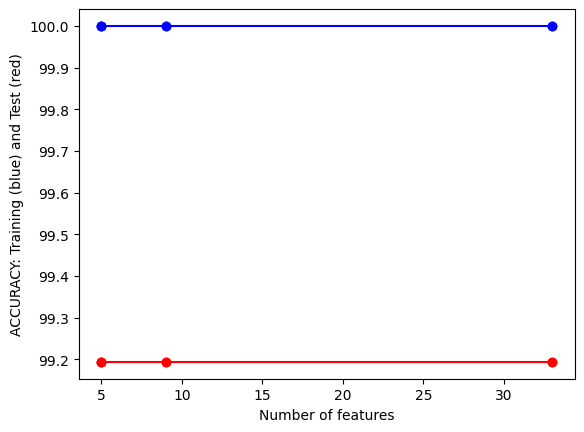

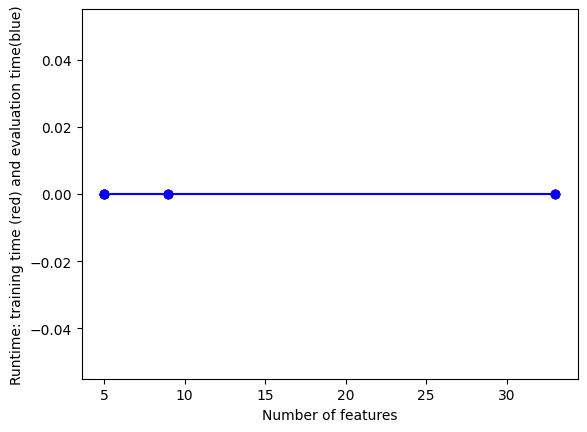

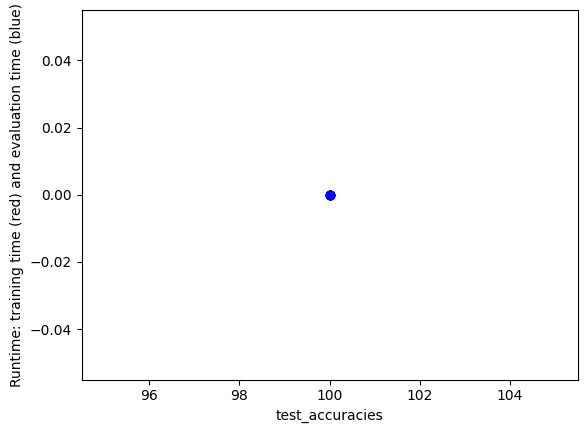

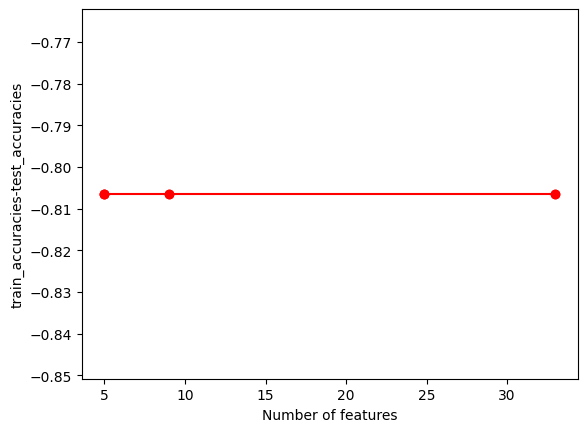

In [12]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

In [13]:
# AGAIN 

y = pd.Series((teledf["sentiment"]=="Pos").astype(int))
print(y)
print(y.shape)

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    0
307    0
308    0
309    0
Name: sentiment, Length: 310, dtype: int32
(310,)


### Record

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil
import requests
import json
import re
#import pycountry
from sklearn.feature_extraction.text import CountVectorizer

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = output_dir = "../websitedata/naiveOutput"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

happygdp = pd.read_csv("../websitedata/happy_py.csv")

happygdp["GDP"] = happygdp["GDP"].str.replace(',', '').astype(float)

happygdp = happygdp.rename(columns={"Unnamed: 0": "Country"})

# Score Categories: 0-4.0 = "Low"; 4.1 - 7.0 = "Moderate"; 7.1 & above = "High" 
happygdp["Happiness"] = pd.cut(happygdp["Score"], bins=[0, 4.0, 7.0, 10], 
                     labels=["Low", "Moderate", "High"])

Happydf = happygdp.drop(["Score", "Happiness", "Entity", "Code"], axis=1)

print(Happydf)

     Country      GDP
0          1    363.7
1        597   6802.8
2        857   4273.9
3       2133  13686.0
4       2393   7014.2
..       ...      ...
132    56105   2255.2
133    56816  15975.7
134    57076   4163.5
135    58181   1487.9
136    58442   1267.0

[137 rows x 2 columns]


In [15]:
x = Happydf.to_numpy()

y = happygdp["Happiness"]
y=np.array(y)

print(x.shape, y.shape)

(137, 2) (137,)


In [16]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[29, 89, 17, 85, 33, 124, 101, 60, 8, 67]
[115, 55, 22, 18, 121, 41, 133, 87, 30, 127]


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(137, 2) (137,)
(137, 2) (137,)
44.95412844036697 35.714285714285715 0.0 0.0


In [18]:
# FEATURE SELECTION FOR RECORD DATA

from sklearn.feature_selection import VarianceThreshold

##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]
    
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

267473890.76700944
595615971.6199687
THRESHOLD = 278789134.9343529 1
THRESHOLD = 290104379.10169625 1
THRESHOLD = 301419623.2690397 1
THRESHOLD = 312734867.4363831 1
THRESHOLD = 324050111.60372657 1
THRESHOLD = 335365355.77106994 1
THRESHOLD = 346680599.9384134 1
THRESHOLD = 357995844.1057568 1
THRESHOLD = 369311088.27310026 1
THRESHOLD = 380626332.44044363 1
THRESHOLD = 391941576.6077871 1
THRESHOLD = 403256820.7751305 1
THRESHOLD = 414572064.9424739 1
THRESHOLD = 425887309.1098173 1
THRESHOLD = 437202553.27716076 1
THRESHOLD = 448517797.44450414 1
THRESHOLD = 459833041.6118476 1
THRESHOLD = 471148285.779191 1
THRESHOLD = 482463529.9465344 1
THRESHOLD = 493778774.1138779 1
THRESHOLD = 505094018.2812213 1
THRESHOLD = 516409262.4485647 1
THRESHOLD = 527724506.61590815 1
THRESHOLD = 539039750.7832515 1
THRESHOLD = 550354994.9505949 1
THRESHOLD = 561670239.1179384 1
THRESHOLD = 572985483.2852818 1


In [19]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [20]:
#UTILITY FUNCTION TO PLOT RESULTS

import matplotlib.pyplot as plt

def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

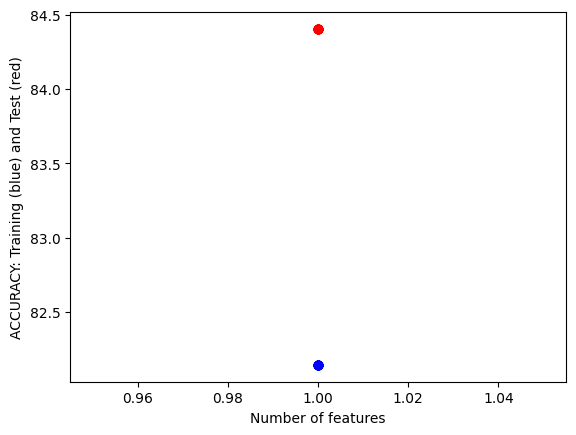

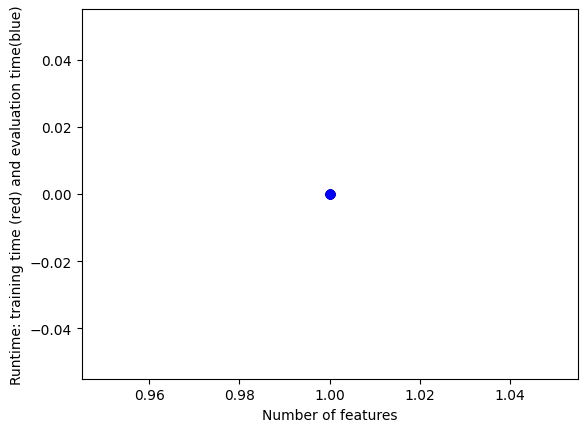

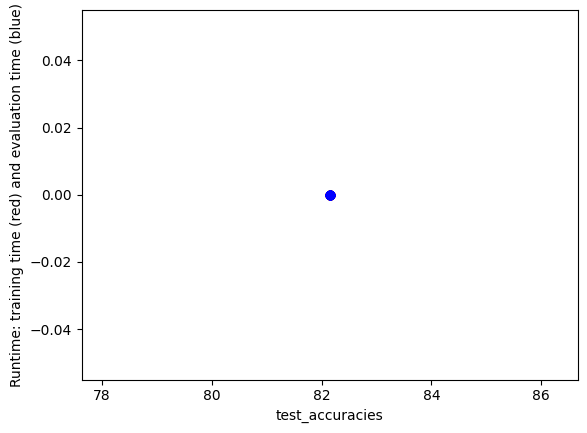

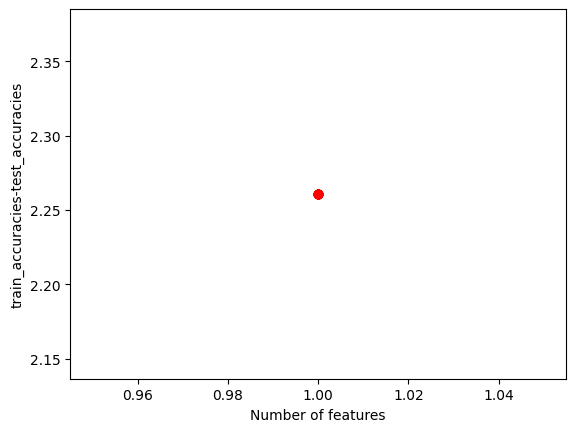

In [21]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

# Dim Reduction Tab

PCA 

In [22]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

In [23]:
y = appledf["Peak"]
y=np.array(y)

x= newAppledf.drop(columns={"Peak", "Unnamed: 0"})
print(x.head)

<bound method NDFrame.head of      Chart Position  Position Duration  (x?)  Points  Country Rank
0                 1                 68    45   16920            29
1                 2                 27     9   14619            44
2                 3                  6     1   13364             1
3                 4                  6     2   12624             2
4                 5                  6     2   12359             3
..              ...                ...   ...     ...           ...
831               7                245    13   10731            28
832              30                 90    10    5425           166
833              33                356    50    5108           146
834              62                412    13    2739           116
835              70                307     3    2487           104

[836 rows x 5 columns]>


In [24]:
# LOAD DATA
X= x
Y= y

#NORMALIZE AND RESHAPE
X=X/np.max(X) #NORMALIZE
# X=X.reshape(60000,28*28); #print(X[0])
cov_X = X.cov()
print(cov_X)

                   Chart Position  Position Duration          (x?)    Points  \
Chart Position       8.667260e-06           0.000040 -3.608966e-07 -0.000697   
Position Duration    3.996314e-05           0.000639  1.775432e-05 -0.004122   
(x?)                -3.608966e-07           0.000018  7.882437e-06 -0.000151   
Points              -6.968281e-04          -0.004122 -1.509267e-04  0.090143   
Country Rank         4.868267e-06           0.000026  1.687945e-07 -0.000486   

                   Country Rank  
Chart Position     4.868267e-06  
Position Duration  2.598144e-05  
(x?)               1.687945e-07  
Points            -4.861844e-04  
Country Rank       9.751437e-06  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


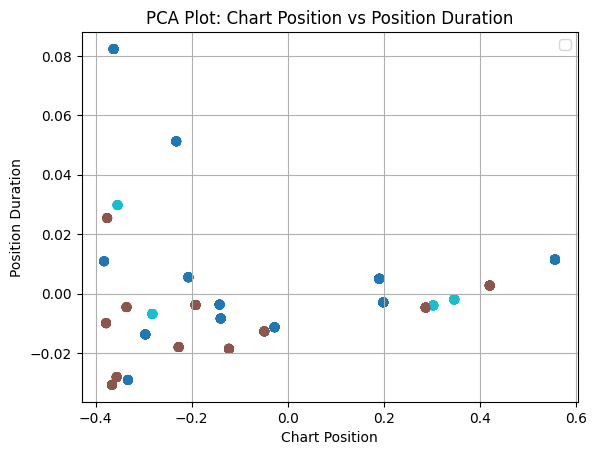

In [25]:
# APPLYING PCA TO WHOLE DATASET

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = X.shape[1]
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Position Duration
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Position Duration")
plt.legend()  
plt.grid(True)
plt.show()

In [26]:
#COMPUTE PRINCIPAL COMPONENTS use min instead of mle due to it being a small dataset
n_components = min(X.shape[0], X.shape[1])

print(n_components)

5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


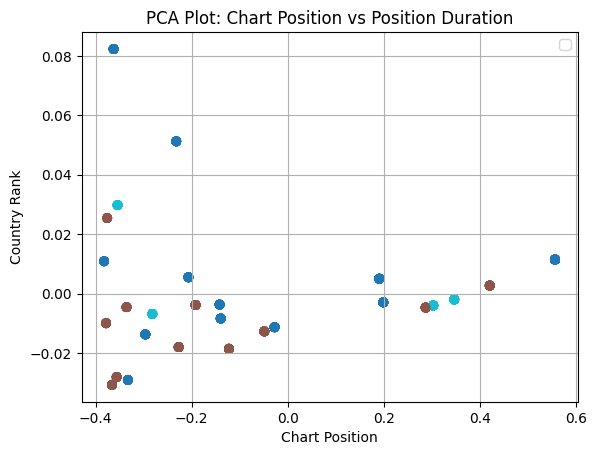

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Country Rank
# 2D PLOT; for (x?) and Points
#2D PLOT; for Chart Position and Position Duration

plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()

t-SNE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RESULTS
shape :  (836, 3)
First few points : 
 [[ 11.846923    3.9316087   2.4159362]
 [-12.5903225  -6.699009    1.395283 ]]


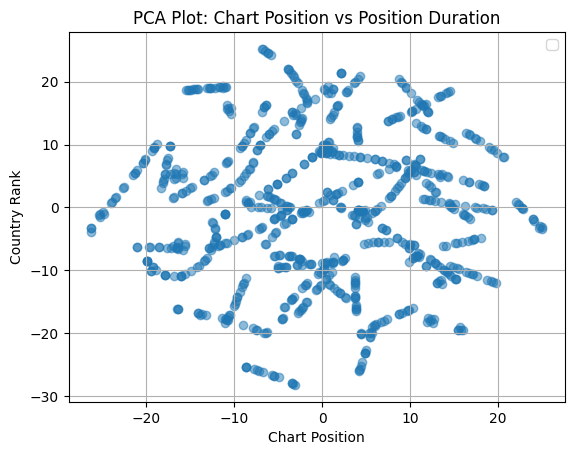

In [28]:
import numpy as np
from sklearn.manifold import TSNE

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=5).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RESULTS
shape :  (836, 3)
First few points : 
 [[ 10.047329   -4.3174453  -4.72189  ]
 [ -5.663476  -18.282518    4.612712 ]]


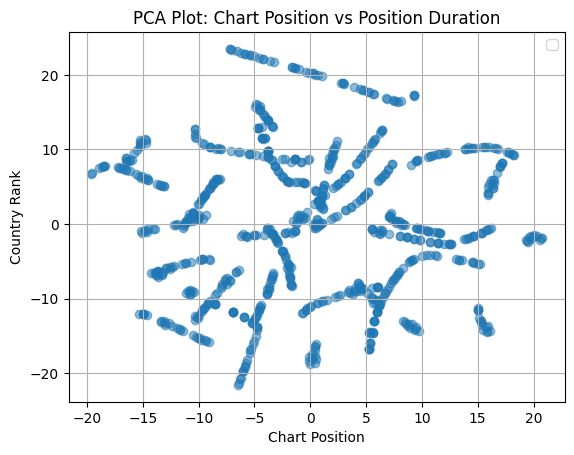

In [29]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RESULTS
shape :  (836, 3)
First few points : 
 [[ -0.706384   -6.634511  -14.965359 ]
 [  2.782514    9.111924    1.8400487]]


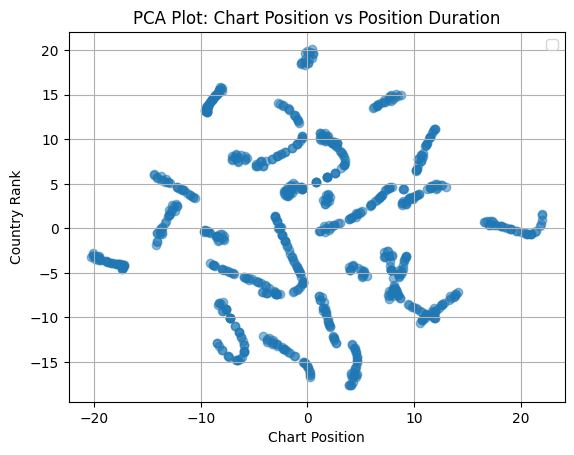

In [30]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=15).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()
plt.show()

# Clustering Tab

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [32]:
spotifydf = pd.read_csv("../websitedata/spotify_py.csv")

spotifydf = spotifydf.drop(columns={"Unnamed: 0.1", "Unnamed: 0", "Artist Name", "Track Name", "Album Name"}, axis=1)
spotifyDF = spotifydf.drop(columns={"Valence"}) # Label (measures positivity) needs to be dropped
spotifyDF.head

<bound method NDFrame.head of      Danceability  Energy  Loudness  Speechiness  Acousticness  Liveness  \
0           0.864   0.556    -7.683       0.1940      0.255000    0.1120   
1           0.831   0.362    -6.085       0.2290      0.000156    0.1680   
2           0.804   0.656    -5.723       0.0896      0.020700    0.1070   
3           0.764   0.720    -6.494       0.2730      0.196000    0.1110   
4           0.854   0.808    -5.958       0.1390      0.019400    0.1080   
..            ...     ...       ...          ...           ...       ...   
388         0.638   0.259   -10.706       0.0898      0.753000    0.2190   
389         0.395   0.443    -9.720       0.1330      0.765000    0.0839   
390         0.695   0.575    -6.334       0.1160      0.198000    0.0614   
391         0.369   0.272   -10.497       0.0364      0.866000    0.1470   
392         0.443   0.298   -12.181       0.0644      0.388000    0.1030   

       Tempo  Album Release Year  
0     99.974          

In [33]:
X = spotifyDF 
y = spotifydf["Valence"] 

print(X.shape, y.shape)
X = np.ascontiguousarray(X)

(393, 8) (393,)


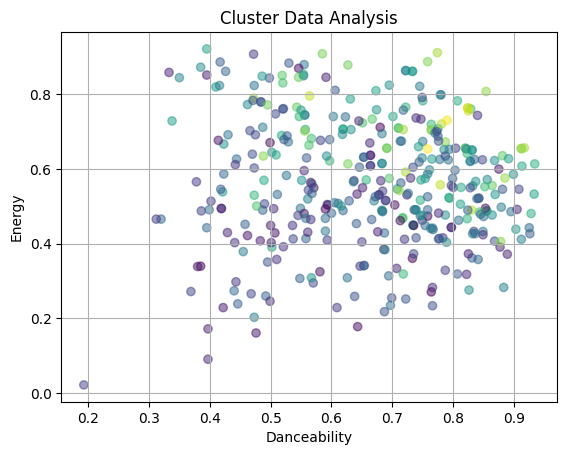

In [34]:
# UTILITY PLOTTING FUNCTION
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel="Danceability", ylabel="Energy",
    title="Cluster Data Analysis")
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

plot(X,y)

In [35]:
# HYPERPARAMETER TUNING
import sklearn.cluster
import warnings
warnings.filterwarnings("ignore")


# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.25*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue

        if(i_print): print(param,sil_scores[-1])

        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 2


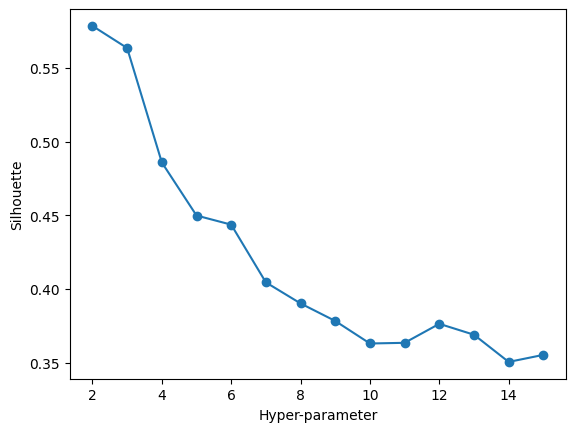

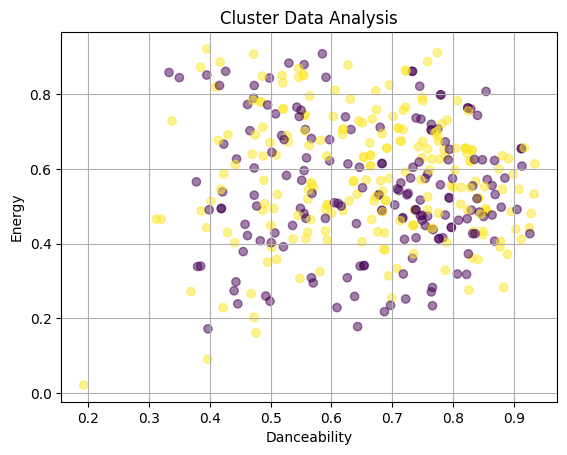

In [36]:
# KMEANS
opt_labels=maximize_silhouette(X,algo="kmeans",nmax=15, i_plot=True)
plot(X,opt_labels)


OPTIMAL PARAMETER = 2


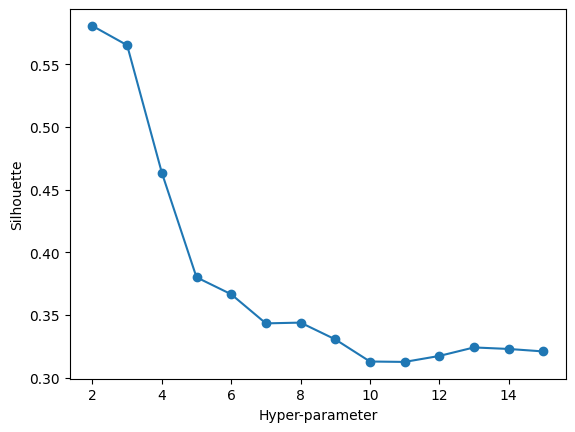

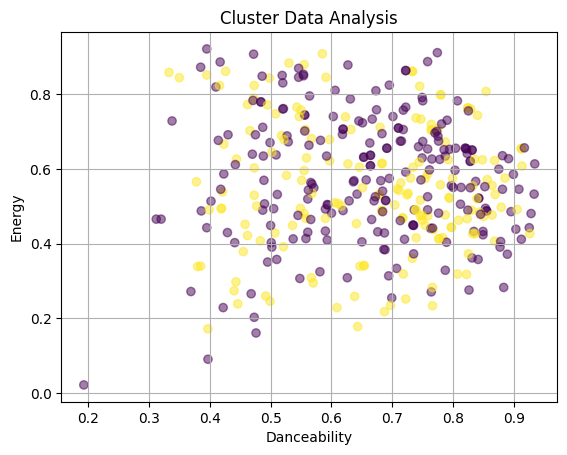

In [37]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X,algo="ag",nmax=15, i_plot=True)
plot(X,opt_labels)

OPTIMAL PARAMETER = 3.5


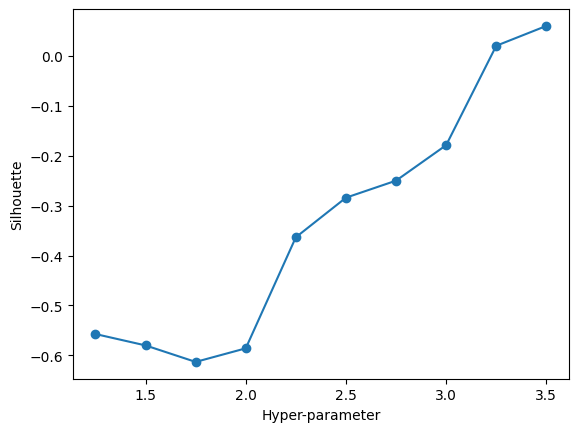

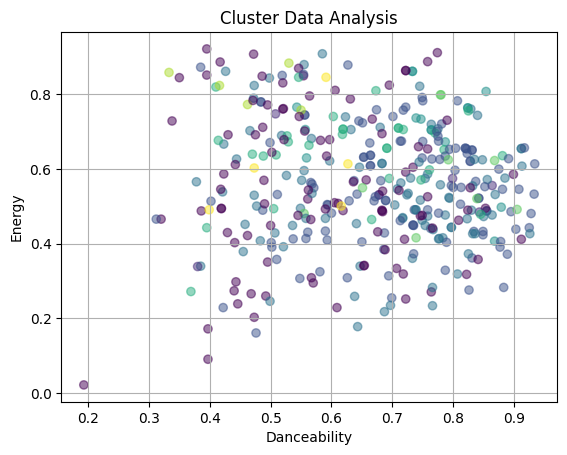

In [38]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
plot(X,opt_labels)

### Final Analysis

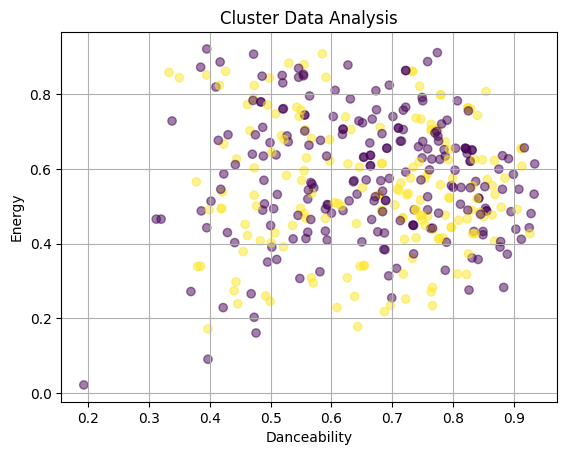

In [39]:
# KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(X)
labels=model.predict(X)
plot(X,labels)

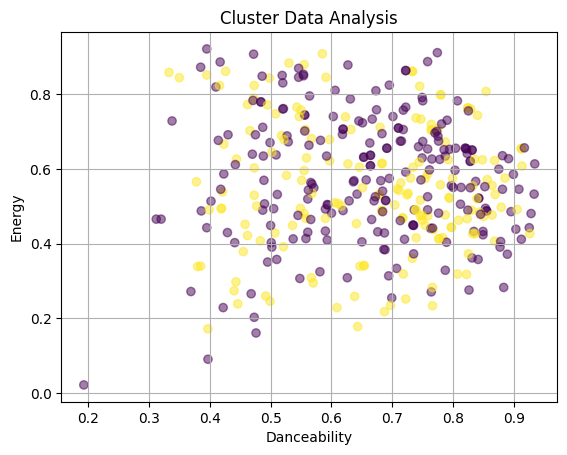

In [40]:
# AGGLOMERATIVE CLUSTERING
model = sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(X)
labels=model.labels_
plot(X,labels)

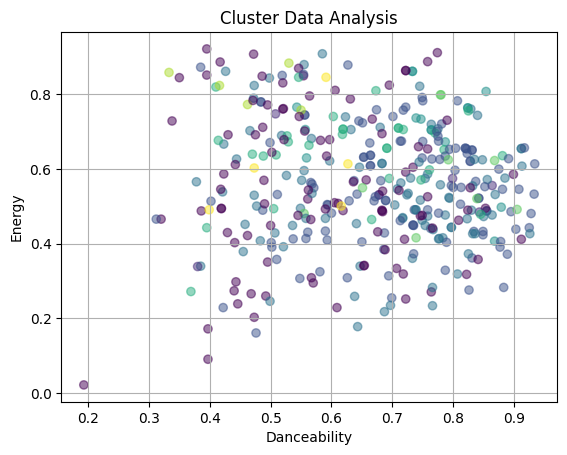

In [41]:
# DBSCAN 
model = sklearn.cluster.DBSCAN(eps=3.5).fit(X)
labels=model.labels_
plot(X,labels)

# Decision Trees

### Music and Happy

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split

happydf = pd.read_csv("../websitedata/happy_py.csv")

appdf = pd.read_csv("../websitedata/apple_py.csv")

In [43]:
happydf = happydf.sort_values(by="Score", ascending=True)
happydf = happydf.drop(columns={"Unnamed: 0", "Code"}, axis=1)
happy20 = pd.concat([happydf.head(20), happydf.tail(20)])
happy20 = happy20.rename(columns={"Entity": "CountryHappy"})

happy20 = happy20.sort_values(by=["CountryHappy"])
happy20 = happy20.reset_index(drop=True)
#print(happy20)
print(happy20.head)

<bound method NDFrame.head of                     CountryHappy   Score         GDP
0                    Afghanistan  1.8590       363.7
1                      Australia  7.0946   64,491.40
2                        Austria  7.0973   52,131.40
3                     Bangladesh  4.2821    2,688.30
4                        Belgium  6.8591   49,582.80
5                       Botswana  3.4353    7,737.70
6                         Canada  6.9607   54,966.50
7                        Comoros  3.5452    1,484.90
8                        Czechia  6.8452   27,638.40
9   Democratic Republic of Congo  3.2072       586.5
10                       Denmark  7.5864   66,983.10
11                         Egypt  4.1705    4,295.40
12                      Ethiopia  4.0906    1,027.60
13                       Finland  7.8042   50,536.60
14                        Gambia  4.2794         840
15                       Germany  6.8918   48,432.50
16                       Iceland  7.5296   72,903.00
17              

In [44]:
country_mapping = {
    "US": "United States",'UK': 'United Kingdom','JP': 'Japan','DE': 'Germany','AU': 'Australia','CA': 'Canada',
    'FR': 'France','IT': 'Italy','KR': 'South Korea','MX': 'Mexico','TH': 'Thailand','BE': 'Belgium','BR': 'Brazil',
    'CH': 'Switzerland','CN': 'China','CO': 'Colombia','ES': 'Spain','HK': 'Hong Kong','ID': 'Indonesia',
    'IE': 'Ireland','IN': 'India','NL': 'Netherlands','NZ': 'New Zealand','TR': 'Turkey','TW': 'Taiwan','ZA': 'South Africa',
    'AE': 'United Arab Emirates','AR': 'Argentina','AT': 'Austria','CL': 'Chile','CZ': 'Czech Republic','DK': 'Denmark',
    'EE': 'Estonia','EG': 'Egypt','FI': 'Finland','GR': 'Greece','HU': 'Hungary','IL': 'Israel','KE': 'Kenya','KZ': 'Kazakhstan',
    'LB': 'Lebanon','LT': 'Lithuania','LU': 'Luxembourg','MY': 'Malaysia','NG': 'Nigeria','NO': 'Norway','PE': 'Peru',
    'PH': 'Philippines','PL': 'Poland','PT': 'Portugal','RO': 'Romania','SA': 'Saudi Arabia','SE': 'Sweden',
    'SI': 'Slovenia','SG': 'Singapore','SK': 'Slovakia','UA': 'Ukraine','VN': 'Vietnam'}
appdf["Country"] = appdf["Country"].map(country_mapping)

appdf = appdf.loc[(appdf["Peak"] == 1)]
appdf = appdf.drop_duplicates(subset="Country", keep="last") #did last bc first was all Doja Cat and want to see some variation
appdf = appdf.drop(columns={"Unnamed: 0"})

appdf = appdf.head(40)

appdf = appdf.sort_values(by=["Country"])
appdf = appdf.reset_index(drop=True)

print(appdf.head)

<bound method NDFrame.head of     Chart Position                    Artist and Title  Position Duration  \
0              198  Elton John & Dua Lipa - Cold Heart                787   
1              198  Elton John & Dua Lipa - Cold Heart                787   
2               84             Travis Scott - MELTDOWN                 76   
3              126                Ed Sheeran - Perfect               1982   
4              198  Elton John & Dua Lipa - Cold Heart                787   
5              126                Ed Sheeran - Perfect               1982   
6                7         Taylor Swift - Cruel Summer                245   
7                7         Taylor Swift - Cruel Summer                245   
8               42            Harry Styles - As It Was                559   
9              126                Ed Sheeran - Perfect               1982   
10             198  Elton John & Dua Lipa - Cold Heart                787   
11              84             Travis Scott - 

In [45]:
# Concatenate then vectorize countries
print(appdf.shape)
happymusicdf = pd.concat([happy20, appdf],axis=1)
print(happymusicdf.shape)
print(happymusicdf.keys())
print(happymusicdf.head)

(40, 8)
(40, 11)
Index(['CountryHappy', 'Score', 'GDP', 'Chart Position', 'Artist and Title',
       'Position Duration', 'Peak', '(x?)', 'Points', 'Country',
       'Country Rank'],
      dtype='object')
<bound method NDFrame.head of                     CountryHappy   Score         GDP  Chart Position  \
0                    Afghanistan  1.8590       363.7             198   
1                      Australia  7.0946   64,491.40             198   
2                        Austria  7.0973   52,131.40              84   
3                     Bangladesh  4.2821    2,688.30             126   
4                        Belgium  6.8591   49,582.80             198   
5                       Botswana  3.4353    7,737.70             126   
6                         Canada  6.9607   54,966.50               7   
7                        Comoros  3.5452    1,484.90               7   
8                        Czechia  6.8452   27,638.40              42   
9   Democratic Republic of Congo  3.2072     

In [46]:
happysongsdf = happymusicdf[happymusicdf["CountryHappy"] == happymusicdf["Country"]]
happysongsdf["GDP"] = pd.to_numeric(happysongsdf["GDP"].str.replace(',', ''), errors='coerce')
print(happysongsdf.shape)
print(happysongsdf.head)

#happysongsdf.to_csv("../websitedata/happyCountryMatch.csv")

(9, 11)
<bound method NDFrame.head of    CountryHappy   Score      GDP  Chart Position  \
1     Australia  7.0946  64491.4             198   
2       Austria  7.0973  52131.4              84   
10      Denmark  7.5864  66983.1             198   
11        Egypt  4.1705   4295.4              84   
13      Finland  7.8042  50536.6             126   
15      Germany  6.8918  48432.5              84   
28  Netherlands  7.4030  55985.4             198   
29  New Zealand  7.1229  48249.3             198   
33  Switzerland  7.2401  92101.5             198   

                      Artist and Title  Position Duration  Peak  (x?)  Points  \
1   Elton John & Dua Lipa - Cold Heart                787     1    41    1056   
2              Travis Scott - MELTDOWN                 76     1     3    1860   
10  Elton John & Dua Lipa - Cold Heart                787     1    41    1056   
11             Travis Scott - MELTDOWN                 76     1     3    1860   
13                Ed Sheeran - Perfe

In [47]:
happysongs = happysongsdf.drop(columns={"Country", "CountryHappy", "Score", "Artist and Title"})
#happysongsdf = happysongsdf.rename(columns={"CountryHappy": "Country"})
print(happysongs)

        GDP  Chart Position  Position Duration  Peak  (x?)  Points  \
1   64491.4             198                787     1    41    1056   
2   52131.4              84                 76     1     3    1860   
10  66983.1             198                787     1    41    1056   
11   4295.4              84                 76     1     3    1860   
13  50536.6             126               1982     1     2    1446   
15  48432.5              84                 76     1     3    1860   
28  55985.4             198                787     1    41    1056   
29  48249.3             198                787     1    41    1056   
33  92101.5             198                787     1    41    1056   

    Country Rank  
1           43.0  
2          153.0  
10         124.0  
11          47.0  
13         158.0  
15         170.0  
28          99.0  
29          49.0  
33         122.0  


In [48]:
# SCORE AND CHART POSITION
X = happysongs
y = happysongsdf["Score"]
y = y.to_numpy()

print(X.shape)
print(y.shape)

(9, 7)
(9,)


In [49]:
from sklearn.model_selection import train_test_split

test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape        :",x_train.shape)
print("y_train.shape        :",y_train.shape)

print("X_test.shape     :",x_test.shape)
print("y_test.shape     :",y_test.shape)

x_train.shape        : (7, 7)
y_train.shape        : (7,)
X_test.shape     : (2, 7)
y_test.shape     : (2,)


In [50]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(max_depth=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i==1 or i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 1
 train error: 0.19910476190476142
 test error: 0.23175000000000034
hyperparam = 10
 train error: 0.0
 test error: 0.18730000000000002
hyperparam = 20
 train error: 0.0
 test error: 0.28869999999999996
hyperparam = 30
 train error: 0.0
 test error: 0.28869999999999996


2 0.10067999999999991 0.23175000000000034


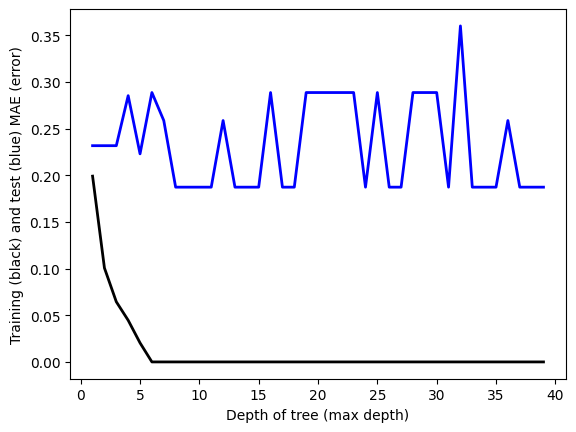

In [51]:
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Depth of tree (max depth)")
plt.ylabel("Training (black) and test (blue) MAE (error)")

i=1
print(hyper_param[i],train_error[i],test_error[i])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("TRAINING SHAPES:",x_train.shape,y_train.shape)
print("TEST SHAPES:",x_test.shape,y_test.shape)

TRAINING SHAPES: (6, 7) (6,)
TEST SHAPES: (3, 7) (3,)


In [53]:
# INITIALIZE MODEL 
model = DecisionTreeRegressor(max_depth=1)
model.fit(x_train,y_train)                     # TRAIN MODEL 


# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

err1=mean_absolute_error(y_train, yp_train) 
err2=mean_absolute_error(y_test, yp_test) 
    
print(" train error:",err1)
print(" test error:" ,err2)

 train error: 0.21123999999999996
 test error: 0.217646666666667


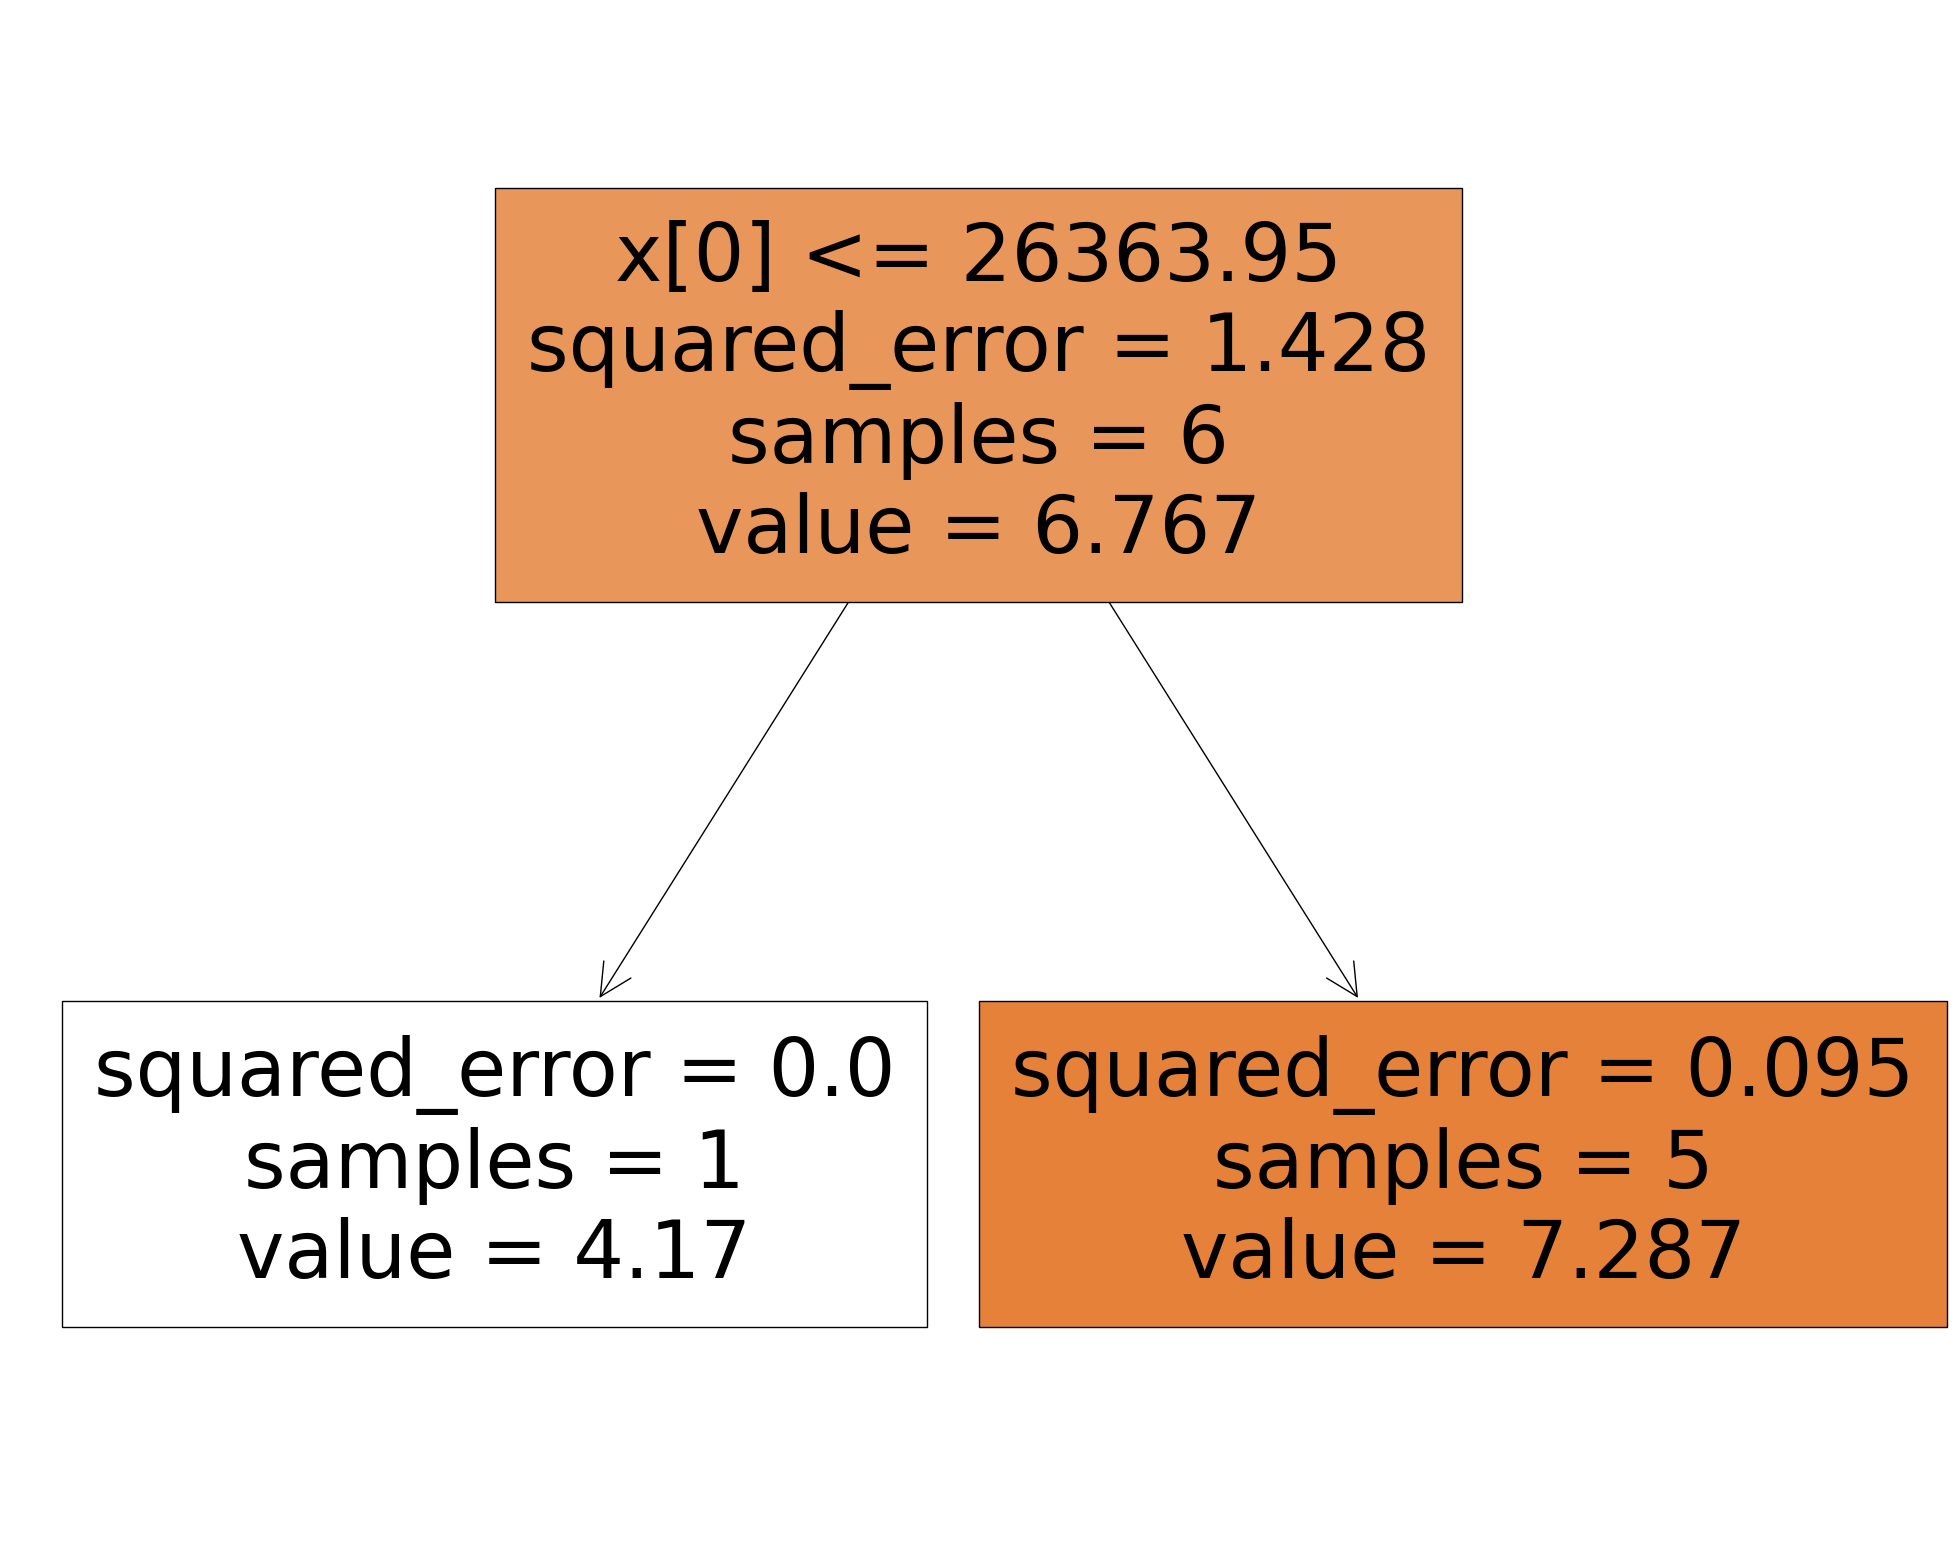

In [54]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

plot_tree(model)

 train error: 5.476143871360148
 test error: 5.467027259259829


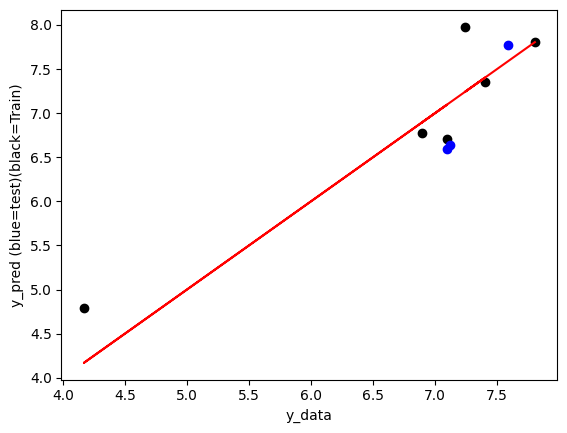

In [55]:
# LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_train,y_train,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

    
err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

print(" train error:",err1)
print(" test error:" ,err2)